# Convolutional Neural Network | TensorFlow

### Author :: Henry Le
#### Date : Jul. 19, 2020

### Import Tensor Flow Lib

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model

### Import Decoder & Image Processing and OS

In [2]:
import base64
import numpy as np
import io
import PIL
import os
import sys

In [3]:
np.set_printoptions(threshold=sys.maxsize)
print(sys.executable)

C:\ProgramData\Anaconda3\envs\tfg\python.exe


### The following mods/libs are not needed for final python.py. Only used during development to see image

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from skimage import data, color
from skimage.transform import resize

In [5]:
# number 7's base64
string64 ="iVBORw0KGgoAAAANSUhEUgAAASwAAAEsCAYAAAB5fY51AAAUs0lEQVR4Xu2dy25WNxeGFz8EEKoaGqRKPYlJQxjBZXRalVFHkLZTZlwKQ0jDBYB6K8AkJIxQkToJh0qVCJDkl6FJE0iIvbdfby/7+ab4sPy8Ky+2t7f3se3t7W3jBwEIQMABgWMYlgOVCBECEHhHAMMiESAAATcEMCw3UhEoBCCAYZEDEICAGwIYlhupCBQCEMCwyAEIQMANAQzLjVQECgEIYFjkAAQg4IYAhuVGKgKFAAQwLHIAAhBwQwDDciMVgUIAAhgWOQABCLghgGG5kYpAIQABDIscgAAE3BDAsNxIRaAQgACGRQ5AAAJuCGBYbqQiUAhAAMMiByAAATcEMCw3UhEoBCCAYZEDEICAGwIYlhupCBQCEMCwyAEIQMANAQzLjVQECgEIYFjkAAQg4IYAhuVGKgKFAAQwLHIAAhBwQwDDciMVgUIAAhgWOQABCLghgGG5kYpAIQABDIscgAAE3BDAsNxIRaAQgACGRQ5AAAJuCGBYbqQiUAhAAMMiByAAATcEMCw3UhEoBCCAYZEDEICAGwIYlhupCBQCEMCwyAEIQMANAQzLjVQECgEIYFjkAAQg4IYAhlWBVL/9Znb3rtnLl2bb2xUERAjZCJw5Y/bzz2a3bmVrsuuGMCyB/MvLZjdvmj18aPb6taADmnRH4Ngxs19+wbjGCodhjSW4p34wqhs3zNbXMzZKU00RuHTJ7P79poZUdDAYVibc16+/n1Xxg8BRBDCtowgd/u8Y1nB2uzUxqwwQO2vi119ZHg6RHMMaQu2DZeDi4shGqN4dgRMnzN686W7YoweMYY1EeP682ZMnIxuhepcEmGWly45hpTPbrRE22ZldjQDYedWvvzZ7+rRzCInDx7ASge0tfuWK2b17IxqgatcEWBamy49hpTPbrcFycAQ8qr4jwEHhtETAsNJ47Ssd/ofc3BzRAFW7J4BhpaUAhpXGC8MawYuq+wmwJEzPCAwrnRlLwhHMqPofATbd07MBw0pntluDTfcR8KhqHGtITwIMK53Zbg2ONYyAR1U23AfkAIY1ANreKjwpHAmw0+oLC2YrK50OfsSwMawR8EJVZlkjAXZanaeDw4THsIZx21eLl58zQOyoifB2xNJSRwPOOFQMKxNMTCsTyMabOXXK7NWrxgcpHB6GlREuF/hlhNloU+GGhnD+it8wAhjWMG6frJXjiuRwpe7srFk4OsF94AKRDmgyzH6UV1rPz5utrpYZS6u9YFitKsu4kgi8fWs2M5NUJalw+A9oayupCoUPIIBhkRYQMLPTp802NnQoOCSahy2GlYcjrTgmED6zdvu2bgBzc3yYJBddDCsXSdpxSyAs11S/48fNwnKTXx4CGFYejrTilMD//qe9k4oDonkTA8PKy5PWHBE4d87s2TNdwOxb5WeLYeVnSosOCKj3rQICZlf5EwHDys+UFh0QUO5bheFz5kqTBBiWhiutVkzgwgWztTVtgJxo1/DFsDRcabVSAuoDomHYJ09qz3RVirZIWBhWEcx0UguBErMrNtt1amNYOra0XCEB9d4Vr+BoRcewtHxpvSIC6tdvwlCZXWkFx7C0fGm9EgLBSNSX5nHXlV5sDEvPmB4qIKBeCoYhcu5KLzSGpWdMDxMTUL9+w1KwnMAYVjnW9DQBAfXrN2FI3MZQTlgMqxxreipMoMTrN9zGUFZUDKssb3orSIB9q4KwC3WFYRUCTTdlCXCEoSzvUr1hWKVI008xAiWWghwQLSbnvo4wrGm406uQQImlIB9DFQr4iaYxrGm406uIQIkjDBwQFYkX0SyGFQGJIj4IlDjCEEhwQHS6fMCwpmNPzxkJlNi3CuEuLJitrGQMnKaSCGBYSbgoXCuBEvtWzK6mVx/Dml4DIhhJoMQRhhAiNzGMFCpDdQwrA0SamI5AqaUgr99Mp/HenjGsOnQgioEESiwFOXM1UBxBNQxLAJUmyxC4eNHs0SN9XzwV1DOO7QHDiiVFueoIlJhdsW9Vl+wYVl16EE0kgXBLwtZWZOGBxdi3GghOWA3DEsKlaQ2BEgdE2bfSaDe2VQxrLEHqFyVw+bLZgwf6Ltm30jMe0gOGNYQadSYhUOoIA/tWk8gb1SmGFYWJQjUQKLHJzovNNSh9eAwYVt36EN2/BEqdZmcpWHfKYVh160N0/74So/6mYADNUrD+dMOw6teo+wi546r7FNgFgGGRC1UTKLXRzlKw6jTAsHzIQ5QlDohyx5WfPGOG5Uer7iK9ds3szh39sJld6Rnn6gHDykWSdrISePvWbGYma5MHNsZGu55xzh4wrJw0aSsbgXAe6vXrbM0d2BDvCmr5KlrHsBRUaXMUgTDrUR9j4BPzoySarDKGNRl6Oj6MgPpEezgmsbkJf48EMCyPqjUc82efmf3zj26A3MKgY1uiZQyrBGX6iCJQ4qkgTwSjpKi2EIZVrTR9BVbiqeD8vNnqal9cWxsthtWaok7Ho14KBixv3pidOOEUEGG/I4BhkQiTEyixFLx61Wx5efKhEsBIAhjWSIBUH0egxFLwzBntRv44AtROIYBhpdCibHYCFy6Yra1lb3ZfgywFtXxLto5hlaRNXx8RUJ+5YqO9raTDsNrS09Vo1B9C5cyVq3SIChbDisJEIQUB9exqcVH/io+CC20eTgDDIjsmIaC+mI8XmyeRVd4phiVHTAcHEfjiC7MXLzRseFdQw7WGVjGsGlToMAblPe08FWw3oTCsdrWtdmTKs1ccEK1W9iyBYVhZMNJICgHVyXaWgikq+CyLYfnUzXXUqg9LcN2x67SICh7DisJEoVwEVLOrEB9Xx+RSqd52MKx6tWkuMuXeFZ/qai5dDhwQhtWHzlWMMrwm8/ixJhRmVxqutbWKYdWmSKPxKGdXJ0+abWw0Co5h7SOAYZEQRQgo9644ylBEwio6wbCqkKH9IJTfGeSgaPv5szNCDKsfrScbKcvBydA31zGG1Zyk9Q2I5WB9mniNCMPyqpyjuFXLwXA9TficPR+WcJQMI0PFsEYCpPqnCSiXg2y295d9GFZ/mhcdsWo5yIclispYTWcYVjVStBmIajnIk8E28+WoUWFYRxHi3wcTUC0HOSg6WBL3FTEs9xLWOwDVqzjsXdWruToyDEtNuNP2VbOrgJPlYKdJxafq+xVePXLVZjvLQbVydbfPDKtufdxGp7qzneWg25TIEjiGlQUjjewlEG7+XFrSMGE5qOHqpVUMy4tSjuJUza5YDjpKAlGoGJYIbK/NKj+QynKw16z6b9wYFjmQlYDqoChPB7PK5LYxDMutdPUFrjzK8P33Zmtr9Y2ZiMoSwLDK8m66N9VBUWZXTadN0uAwrCRcFD6MgHJ2NdVme9iPu3vX7OXL4Z8QC1fgnD1r9tNPZrdukT9jCWBYYwk6rB/MJfwx/vGH2d9/D/9jdDj0SUMOT08XFzGuMSJgWGPoietiLGLAEzV/6ZLZ/fsTde68WwxrIgExo4nAV9ItpjVMCAxrGLdDa2FEmYE23Fx4I4B9rTSBMaw0Xrull5fNbt40e/jw/b3i/CCQSiDcRR9eNeIXTwDDimf1rmQwqhs3zNbXEytSHAIHEGCWlZYWGFYCr+vX38+q+EEgF4FvvjH7889crbXfDoYVqTFmFQmKYkkEWBYm4TIMK4JXWAaG8zP8IKAgsL2taLXNNjGsCF3Pnzd78iSiIEUgMIAAhhUPDcM6ghWzq/hkomQ6AZaEacwwrCN4Xblidu9eGlRKQyCWAJvusaTel8OwjuDFcjAtoSidRoBjDWm8MKwjeIUp++ZmGlRKQyCGAMvBGEr7y2BYGFZ61lAjCwFmV+kYMSyWhOlZQ43RBHj5eRhCDItN92GZQ63BBDCrwejYdD8KHccajiLEv8cS4AK/WFKHl2OGFcGQJ4URkChyIAGuSM6bGBhWBE9mWRGQOikSDGh21iycz+Muq/KiY1iRzFt/+Tn8IX7+udmPP77/QwyP3Hd+p0+bbWxEgkosxpOyRGCdF8ewEhKgBtP6lLEkDCW6aDCUpaXo4skFeY8uGVnXFTCsRPmVF/iVNqOYoYeNYpWphO8Yrq7GREEZCLwngGENzISUK5LDH/2XX5r98MPHy62B3RepFj4Fdvu2rqtwPfDepaeuJ1puhQCG1YqSgnEoZ1d8el4gWAdNYlgdiDxkiOFwY/jAhurH7EpFtu12May29R00OvVScKpPzw+CQaWqCGBYVclRRzDKpWAYIUcZ6tDZYxQYlkfVhDFfuGC2tqbrIDwJ3drStU/LbRPAsNrWN2l04avVMzNJVZILh495KM91JQdEBVcEMCxXcmmDvXbN7M4dXR+nTpm9eqVrn5bbJ4Bhta9x9AiDobx+HV08uaDqAGpyIFRwSwDDcitd3sDVy0FOtefVq9fWMKxelf9g3OrlIOeuSLQcBDCsHBQbaOOrr8z++kszEE61a7j22CqG1aPqB4xZefaK2RVJlosAhpWLpPN2wvkoxY9jDAqq/baJYfWr/e7IVRf0ffed2ZMnAIZAPgIYVj6WLltSvjfIMQaXKVF10BhW1fLog1MtBa9eNQt3hvGDQE4CGFZOms7aunjR7NEjTdBstGu49t4qhtVxBqhmVwEpy8GOE0s4dAxLCLfmppV7V9zIULPyvmPDsHzrNzj648d117ycPWv2/Png0KgIgUMJYFgdJsfly2YPHugGzgV9Ora9t4xhdZYByqXgDkr2rzpLqoLDxbAKwq6hK+VSMIxvYcFsZaWGkRJDiwQwrBZVPWRMzK46ErvRoWJYjQp70LDUF/Sxd9VRMk00VAxrIvClu1Vf0Mf1x6UV7bM/DKsT3dUX9LHR3kkiTTxMDGtiAUp1H85GvXyp6Y0Po2q40urHBDCsTrJCeUEfe1edJFEFw8SwKhChRAiq9wZ5DaeEevSxQwDD6iQXVIbFjaKdJFAlw8SwKhFCGYbq8/Nzc2br68rIaRsC+wlgWI1nhOo4Q9gT29xsHB7Dq44AhlWdJHkDUt3XzgV9eXWitTgCGFYcJ5ellK/icO7KZUq4DxrDci/h4QNQHmXAsBpOnIqHhmFVLM6Y0JSzK44yjFGGumMIYFhj6FVcVzm74kbRioVvPDQMq0GBw8nzpSXdwDjZrmNLy58mgGE1mCHK2RXLwQYTxtGQMCxHYsWEqty7Cv1zsj1GBcqoCGBYKrITtau8pI/Z1USi0u0uAQyroWRQnWrfQcTeVUPJ4nQoGJZT4Q4KW3lJH7OrhhLF8VAwLMfifRi68pI+ZlcNJYrjoWBYjsX7MHTV00Hua28oSZwPBcNyLuDe8FV3XvGic0NJ4nwoGJZzAXfCV82u5ufNVlcbgcQw3BPAsNxLaHbunNmzZ5qB8JKzhiutDiOAYQ3jVk0t5UFRZlfVyEwg/xLAsJyngmrfKmBh78p5cjQYPoblWFTVbaI7SFgOOk6ORkPHsJwKq1wKBiQcFHWaGI2HjWE5FVi5FAxIuPPKaWI0HjaG5VBg1We79qLgZLvDxOggZAzLmcjqF5zZv3KWEJ2Fi2E5E1z5gvMOioUFs5UVZ2AItwsCGJYzmZX3XTG7cpYMHYaLYTkSvcRykL0rRwnRYagYliPR1cvBuTmz9XVHQAi1OwIYliPJlfddce7KUSJ0HCqG5Uh81Y0MAQGn2h0lQsehYliOxFcdFmXfylESdB4qhuUkAVQb7uxbOUkAwnxHAMNykgiq0+0sBZ0kAGFiWJ5yQLEcvHrVbHnZEwVi7Z0AMywHGaC6Rob7rhyIT4j7CGBYlSeE8hoZloOVi094HxHAsCpPCtVRBs5dVS484R1IAMOqODGUs6vZWbMXLyoePKFB4AACGFbFaaGaXYUhs+FesfCEdigBDKvS5FDOrsKQ2XCvVHjC+iQBDKvSBFEcY9gZ6smTZhsblQ6csCDwCQIYVoXpcfGi2aNHusB4FUfHlpa1BDAsLd9BrStnVyEgjjMMkoVKFRDAsCoQYW8I6r0rrj+uTHDCSSKAYSXh0hdWX4HM7EqvIT3oCGBYOraDWlYuB9m7GiQJlSoigGFVJIZyOcjJ9oqEJpTBBDCswejyV/ziC93pc2ZX+fWixfIEMKzyzA/tUXWyndlVRSITyigCGNYofHkrq/avmF3l1YnWpiOAYU3Hfl/PqhtFw1PHV68qGSRhQGAkAQxrJMAc1VX3tYfYOMaQQyHaqIUAhlWBEvPzZo8f5w+EdwbzM6XFaQlgWNPyN+Xsir2ricWl++wEMKzsSNMaVD0ZZDmYpgOlfRDAsCbU6dw5s2fPdAGwf6VjS8vTEMCwpuFuylPtYUhnz5o9fz7R4OgWAiICGJYI7FHNqs5c7fTL/tVRCvDvHglgWBOopr6gj5PtE4hKl0UIYFhFMO/vRD27Wlw0W1qaYGB0CQExAQxLDPjD5tV7V5xsLywo3RUlgGEVxW2mvqCPr+EUFpTuihLAsIriNlMuBznZXlhMuitOAMMqiFy9HOTJYEEx6WoSAhhWQezffmv29KmmQ54MarjSal0EMKyCeszM2Lt3BxU/ZlcKqrRZGwEMq6Aiqv2ruTmz9fWCA6ErCExEAMMqCF5hWCwFCwpIV5MTwLAKSqBYEvKCc0EB6WpyAhhWQQlyb7pzjKGgeHRVBQEMq6AMuY81sNFeUDy6qoIAhlVYhlzLwnDx3+Zm4eDpDgITE8CwCguQa5bF7KqwcHRXBQEMawIZLl82e/BgeMeXLpndvz+8PjUh4JUAhjWRckNNC7OaSDC6rYIAhjWhDGF5+PvvZltbRwcR9qzCPVe3bh1dlhIQaJUAhlWBssG47t0ze/Fi/4dPw6HQ2VmzK1cwqgpkIoQKCGBYFYhACBCAQBwBDCuOE6UgAIEKCGBYFYhACBCAQBwBDCuOE6UgAIEKCGBYFYhACBCAQBwBDCuOE6UgAIEKCGBYFYhACBCAQBwBDCuOE6UgAIEKCGBYFYhACBCAQBwBDCuOE6UgAIEKCGBYFYhACBCAQBwBDCuOE6UgAIEKCGBYFYhACBCAQBwBDCuOE6UgAIEKCGBYFYhACBCAQBwBDCuOE6UgAIEKCGBYFYhACBCAQBwBDCuOE6UgAIEKCGBYFYhACBCAQByB/wNo5oL1n5ODOwAAAABJRU5ErkJggg=="

In [6]:
# user_input_base64 = input("Please paste base64 string : ")
# user_input_base64 = user_input_base64.split(",")[-1]

In [7]:
def plot_input(img_arr1, img_arr2):
    
    image1 = np.asarray(img_arr1, dtype=np.float64)/255
    image2 = img_arr2
    
    image1_resized = resize(image1, (28,28), anti_aliasing=True)
    image2_resized = resize(image2, (28,28), anti_aliasing=True)
    
    fig, axes = plt.subplots(nrows=2, ncols=2)

    ax = axes.ravel()

    ax[0].imshow(image1)
    ax[0].set_title("Orig. Img - GC")

    ax[1].imshow(image1_resized)
    ax[1].set_title("Resized Img - GC (anti_alias)")
    
    ax[2].imshow(image2)
    ax[2].set_title("Orig. Invt.Norm image")

    ax[3].imshow(image2_resized)
    ax[3].set_title("Resized Invt.Norm image (anti_alias)")
    
#     ax[0].set_xlim(0, 300)
#     ax[0].set_ylim(0, 300)
    plt.tight_layout()
    plt.show()

In [8]:
# load the trained model
model = load_model("../Trained_Model/final_model.h5")

# recompile the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [9]:
# define some colors for print-function
red = '\033[31m'
bolt = '\033[1m'
blu = '\033[34m'
prp = '\033[35m'
nc = '\033[0m'

def img_predict (base64string):
    
    # decode from base64 to ASCII
    base64_decoded = base64.b64decode(base64string)
    RGB_img = PIL.Image.open(io.BytesIO(base64_decoded))
    GC_img = RGB_img.convert(mode="L")
    resize_GC_img = GC_img.resize((28,28))
    
    # Invert the pixel values to highlight the features of the hand-written digit
    # as 0 x 0 = 0 => weight is not updated
    # pixel value of black (which is the digit ink pixel value) is 0
    # this would decrease performance (slower eight update) of CNN
    # therefore, inverted the grayscale to change the black pixel value
    # instead of 0 closer to 1 (after scaled by /=255)
    inverted_norm_array = 1 - np.asarray(resize_GC_img, dtype=np.float64)/255
    plot_input(GC_img, inverted_norm_array)
    print(inverted_norm_array.shape)
 
    
    # con2v takes an array of 4 parameters, need to expand to add
    # additional dimension to the image
    new_GC_etx = np.expand_dims(inverted_norm_array, axis=(3,0))
    print(new_GC_etx.shape)


    

    
#     print("before converstion :: \n", image)
#     print("after converstion :: \n", image)
    
    prediction = np.argmax(model.predict(new_GC_etx), axis=-1)
    print(f"With Inversion | This is number :: {red}{bolt}{prediction[0]}{nc}\n{('=')*40}")
    return  prediction

In [10]:
def img_predict_no_invert (base64string):
    
    # decode from base64 to ASCII
    base64_decoded = base64.b64decode(base64string)
    RGB_img = PIL.Image.open(io.BytesIO(base64_decoded))
    GC_img = RGB_img.convert(mode="L")
    resize_GC_img = GC_img.resize((28,28))
    
    # Invert the pixel values to highlight the features of the hand-written digit
    # as 0 x 0 = 0 => weight is not updated
    # pixel value of black (which is the digit ink pixel value) is 0
    # this would decrease performance (slower eight update) of CNN
    # therefore, inverted the grayscale to change the black pixel value
    # instead of 0 closer to 1 (after scaled by /=255)
    inverted_norm_array = np.asarray(resize_GC_img, dtype=np.float64)/255
    plot_input(GC_img, inverted_norm_array)
    print(inverted_norm_array.shape)
 
    
    # con2v takes an array of 4 parameters, need to expand to add
    # additional dimension to the image
    new_GC_etx = np.expand_dims(inverted_norm_array, axis=(3,0))
    print(new_GC_etx.shape)


    

    
#     print("before converstion :: \n", image)
#     print("after converstion :: \n", image)
    
    prediction = np.argmax(model.predict(new_GC_etx), axis=-1)
    print(f"No inversion | This is number :: {red}{bolt}{prediction[0]}{nc}\n{('=')*40}")
    return prediction

In [11]:
# img_predict(user_input_base64)

In [12]:
# img_predict_no_invert(user_input_base64)

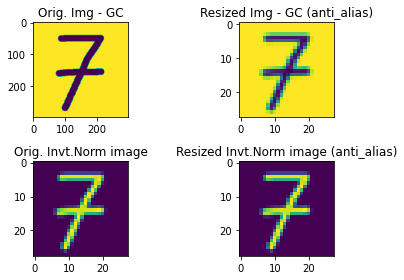

(28, 28)
(1, 28, 28, 1)
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
With Inversion | This is number :: 7


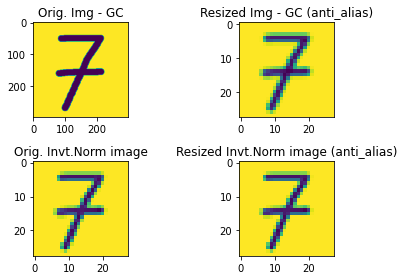

(28, 28)
(1, 28, 28, 1)
No inversion | This is number :: 0


array([0], dtype=int64)

In [13]:
img_predict(string64)
img_predict_no_invert(string64)

In [14]:
# !jupyter nbconvert --to script predict.ipynb

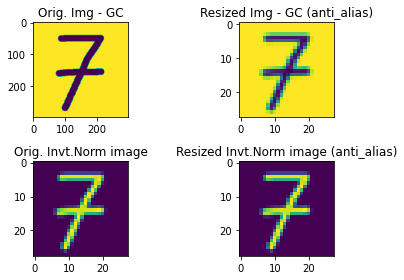

(28, 28)
(1, 28, 28, 1)
With Inversion | This is number :: 7


In [15]:
result = img_predict(string64)

In [16]:
type(result)

numpy.ndarray

In [18]:
import json

In [19]:
json = json.dumps({
    'result': int(result)
})


In [20]:
json

'{"result": 7}'